In [1]:
import pandas as pd

data=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.10.14/data_sum.xlsx")


data

,FORCE_C(Left),X COORDINATE_C(Left),Y COORDINATE_C(Left),FSR DATA_C(Left),FORCE_B(Right),FSR DATA_B(Right)
0,1.245014,1.529382,-0.886157,1.361804,2.277552,1.757358
1,1.274000,1.749337,-1.368345,1.264316,2.319914,1.524890
2,1.389941,1.748738,-1.086286,1.166829,2.447001,1.524890
3,1.254676,1.777098,-1.389048,0.874366,2.531726,1.292421
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
608,2.037281,0.870283,0.317515,1.069341,1.472665,-0.334861
609,1.969648,0.872209,0.349021,1.166829,0.413604,-0.102392
610,1.998633,1.085799,0.020937,1.069341,1.345578,0.362545
611,1.902016,0.930805,0.082657,0.776878,1.049041,1.059952


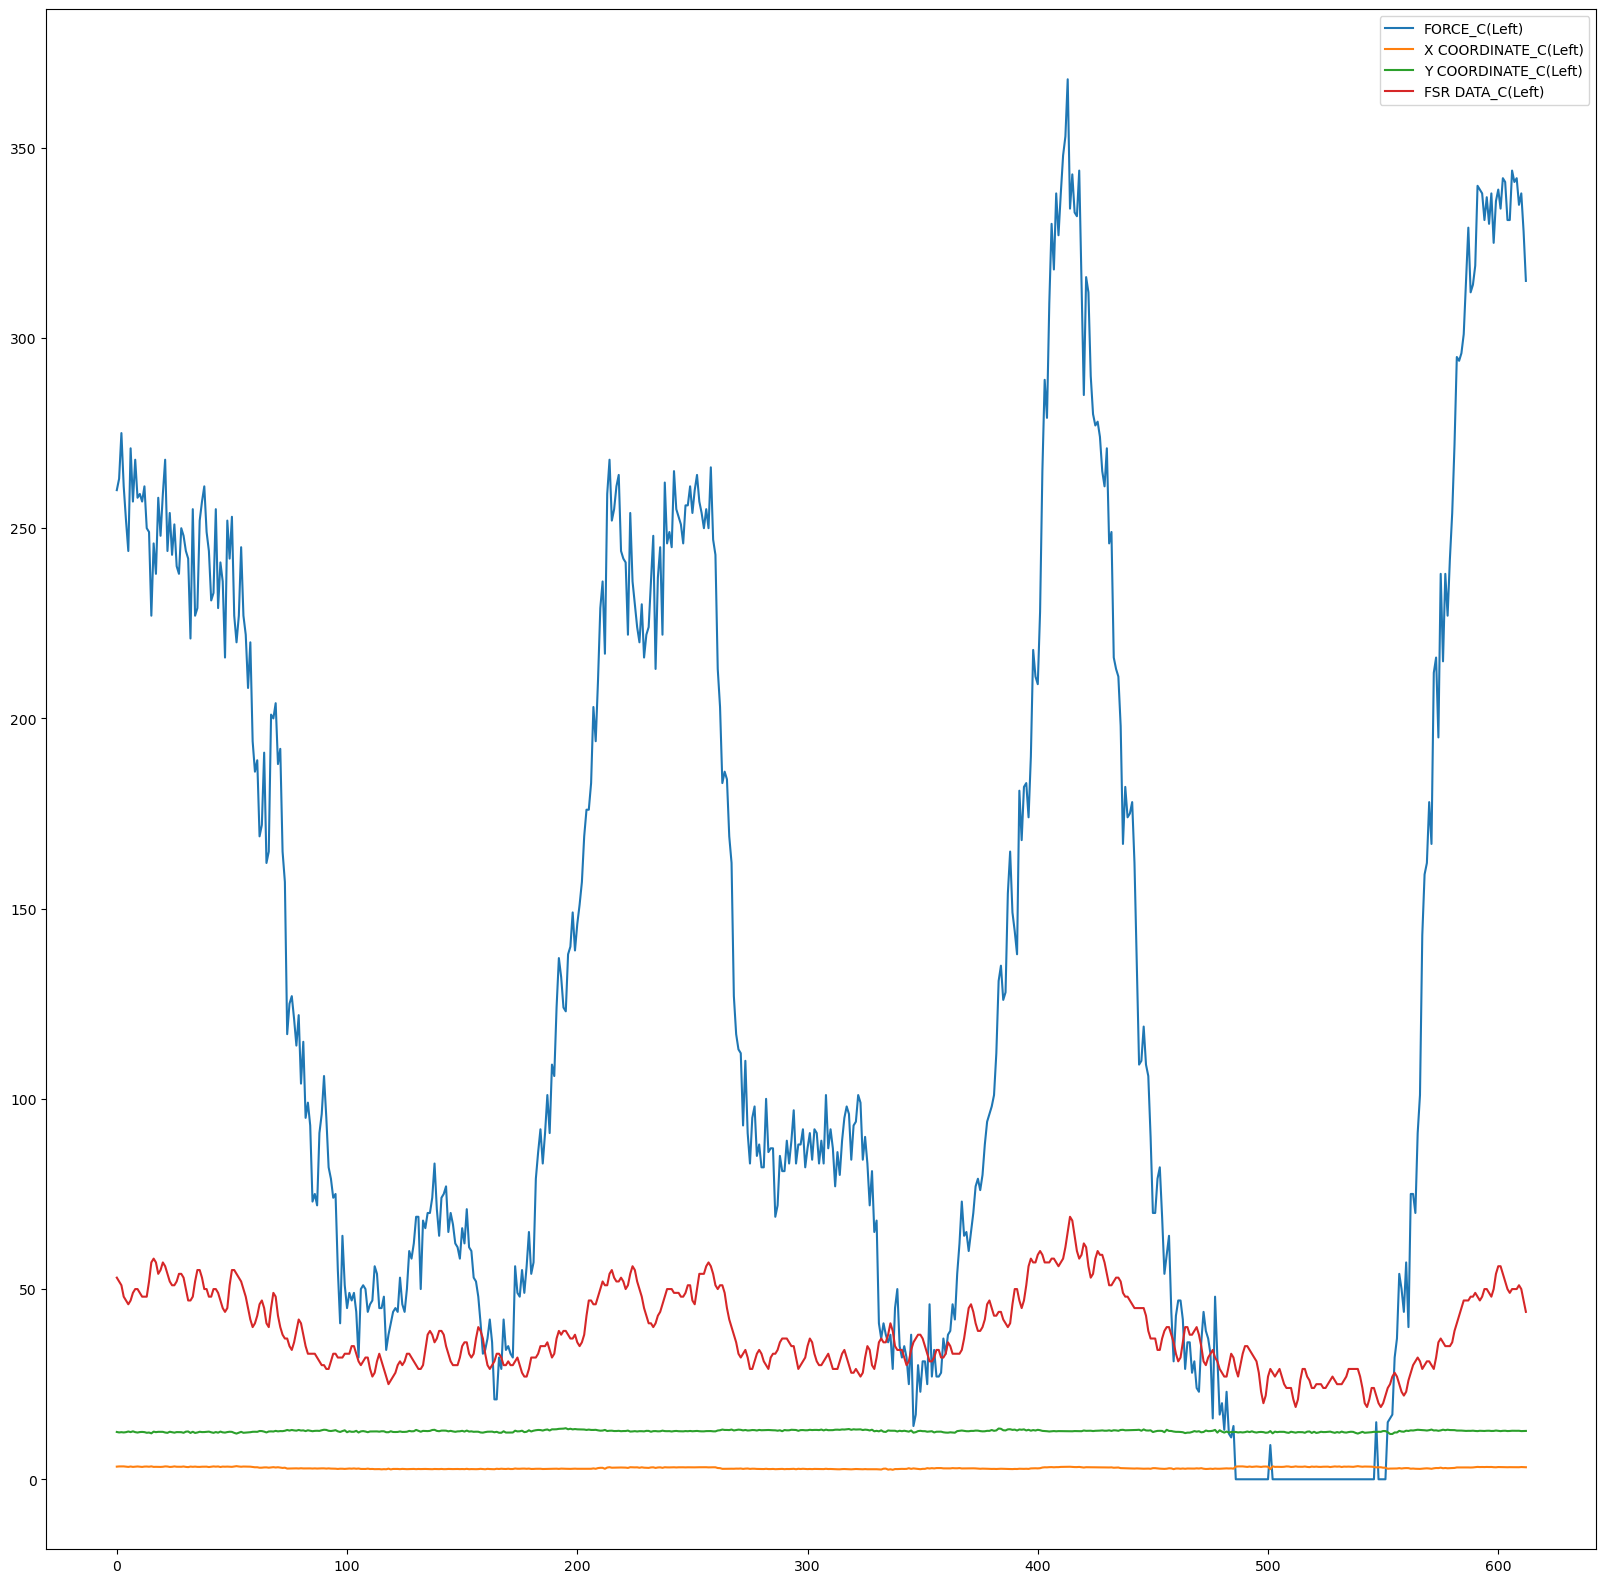

In [2]:
data2=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.10.14/squart.xlsx")

L=data2.loc[:,['FORCE_C(Left)','X COORDINATE_C(Left)','Y COORDINATE_C(Left)','FSR DATA_C(Left)']]

L.plot(figsize=(20,20))

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
L_scaled=scaler.fit_transform(L)

L2=pd.DataFrame(data=L_scaled)

L_new=L2.set_axis(["FORCE_C(Left)","X COORDINATE_C(Left)","Y COORDINATE_C(Left)",
            "FSR DATA_C(Left)"],axis="columns")

<Axes: >

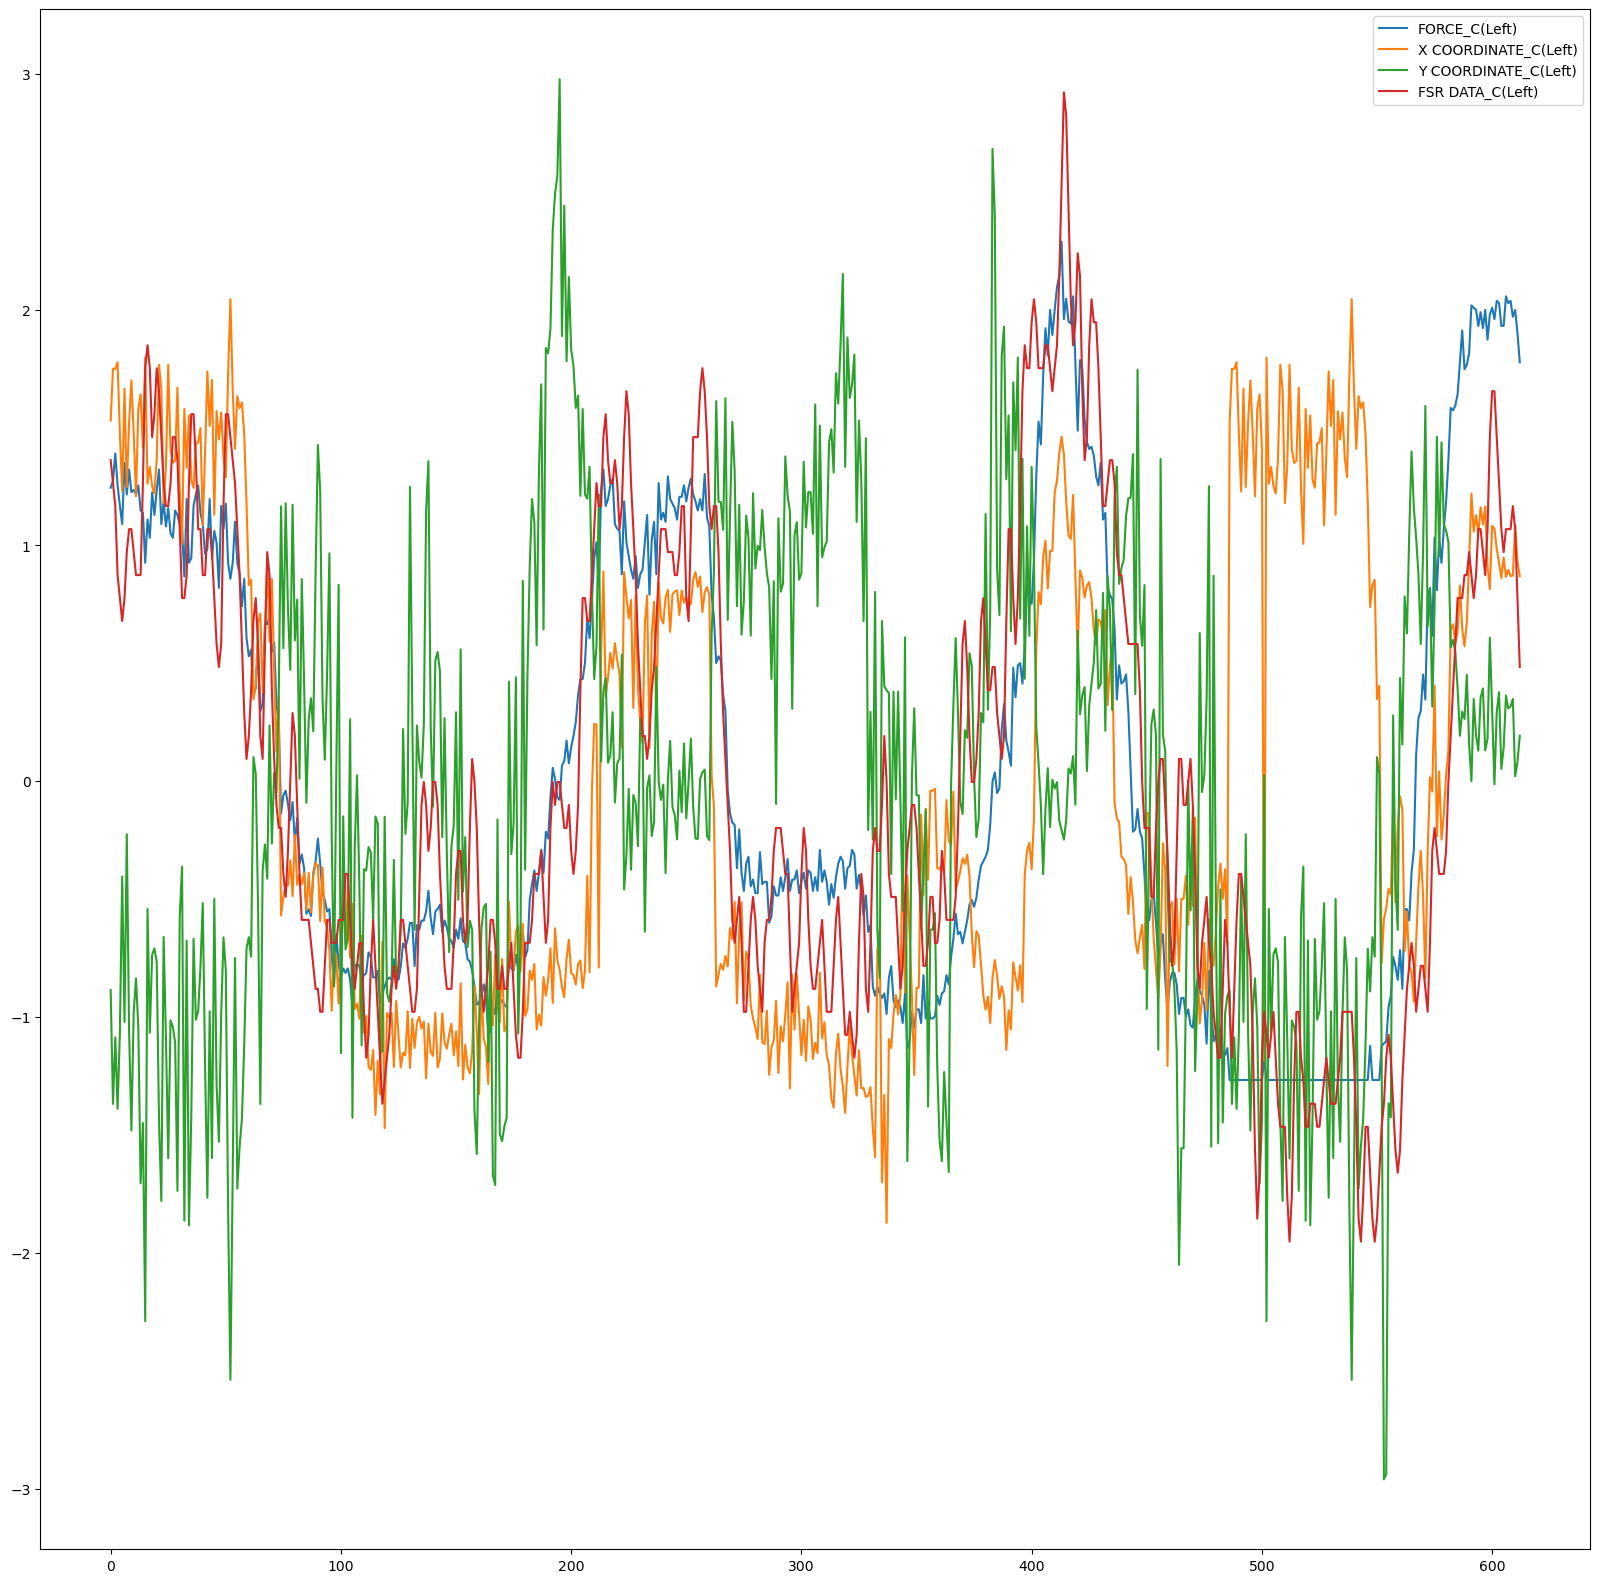

In [27]:
L_new.plot(figsize=(20,20))

In [28]:
L_new.isnull().sum()

FORCE_C(Left)           0
X COORDINATE_C(Left)    0
Y COORDINATE_C(Left)    0
FSR DATA_C(Left)        0
dtype: int64

In [3]:
data.isnull().sum()

FORCE_C(Left)           265
X COORDINATE_C(Left)    265
Y COORDINATE_C(Left)    265
FSR DATA_C(Left)        265
FORCE_B(Right)          265
FSR DATA_B(Right)       265
dtype: int64

In [4]:
print((265/613)*100)

43.2300163132137


<Axes: >

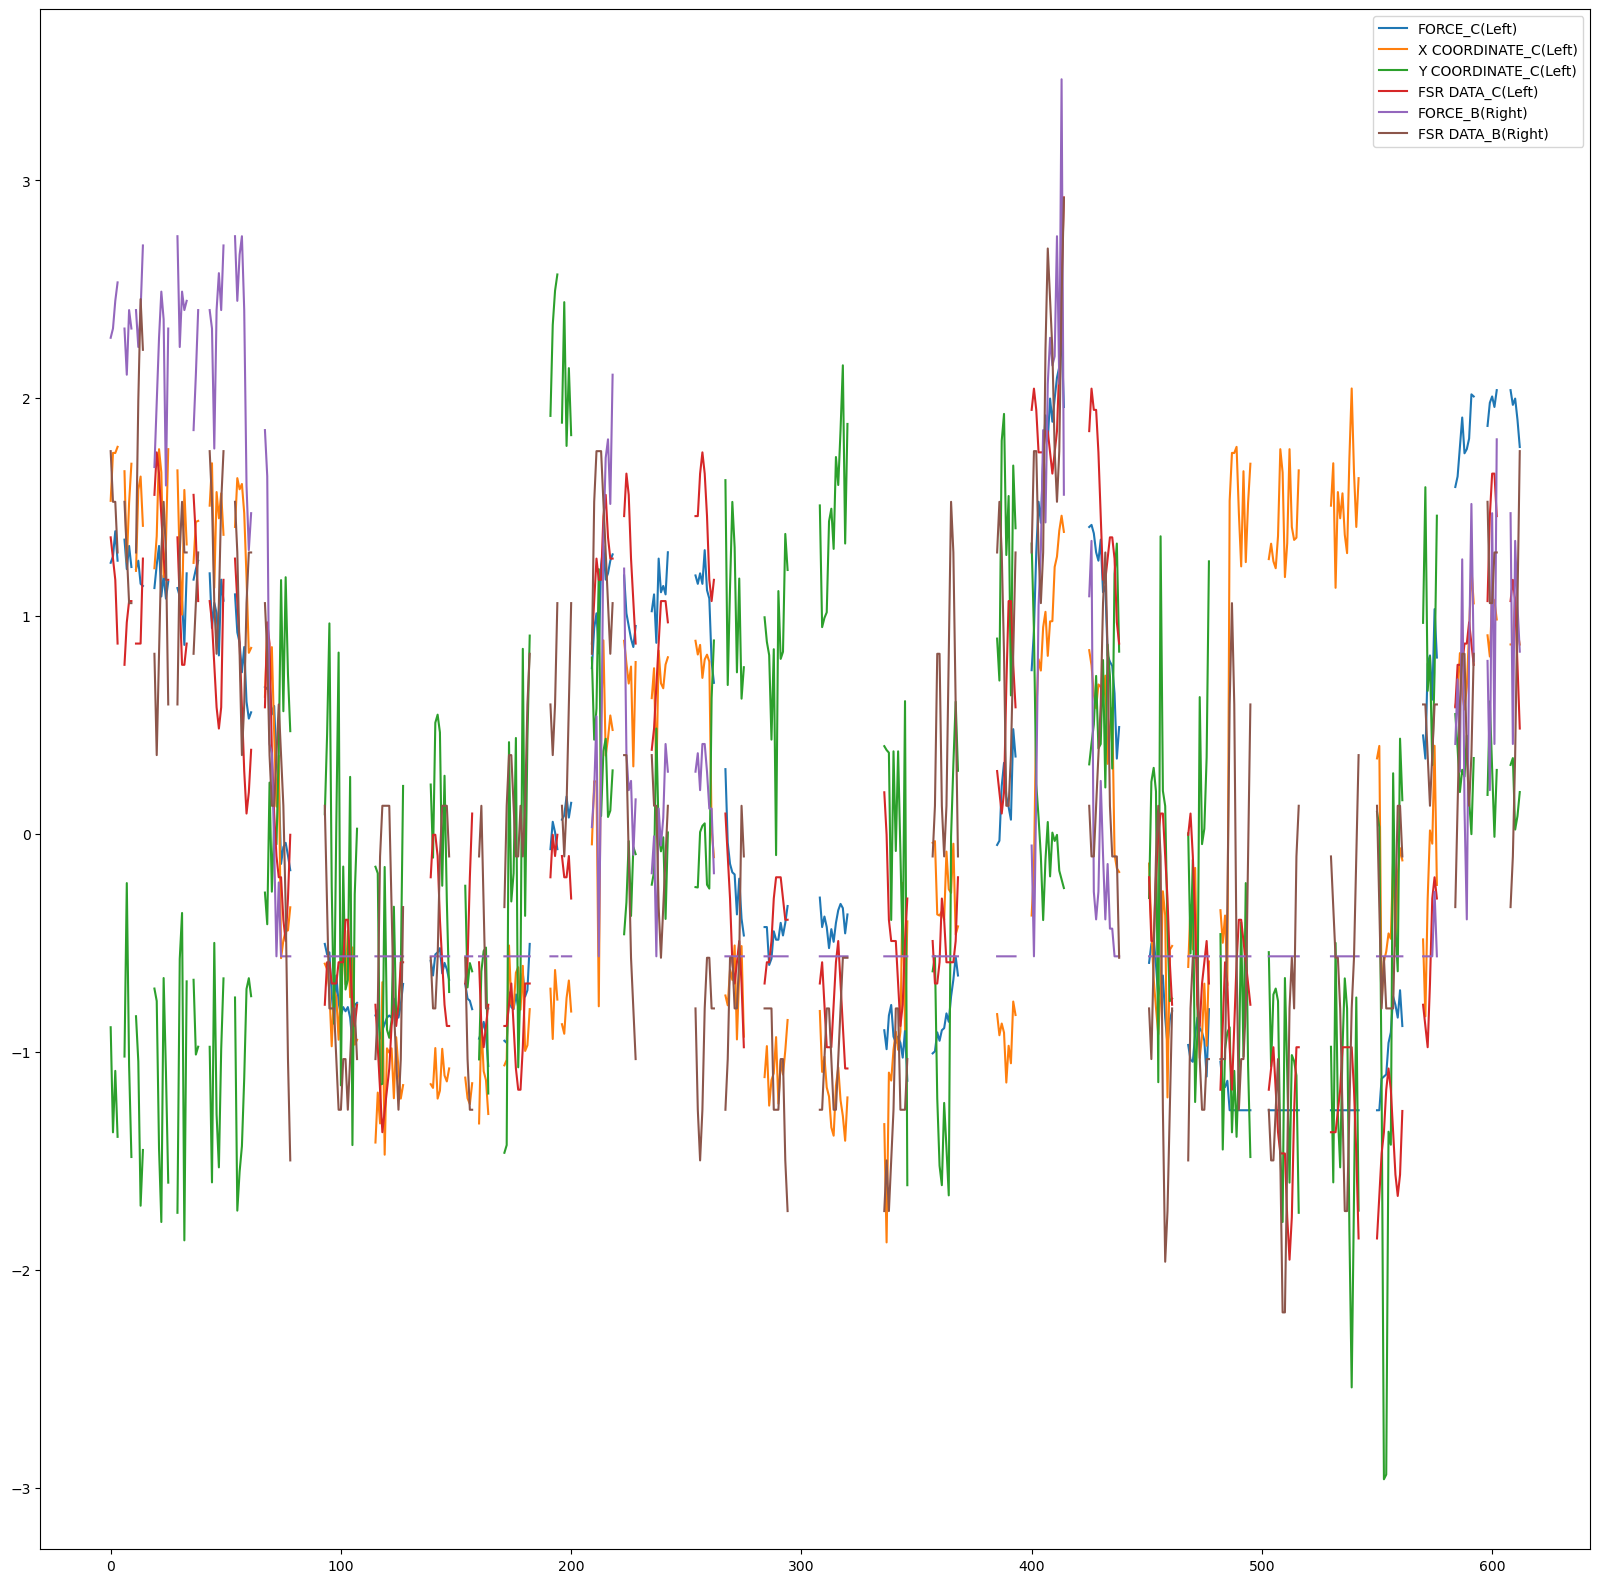

In [5]:
data.plot(figsize=(20,20))

In [6]:
L=data.loc[:,['FORCE_C(Left)','X COORDINATE_C(Left)','Y COORDINATE_C(Left)','FSR DATA_C(Left)']]

R=data.loc[:,['FORCE_B(Right)','FSR DATA_B(Right)']]

<Axes: >

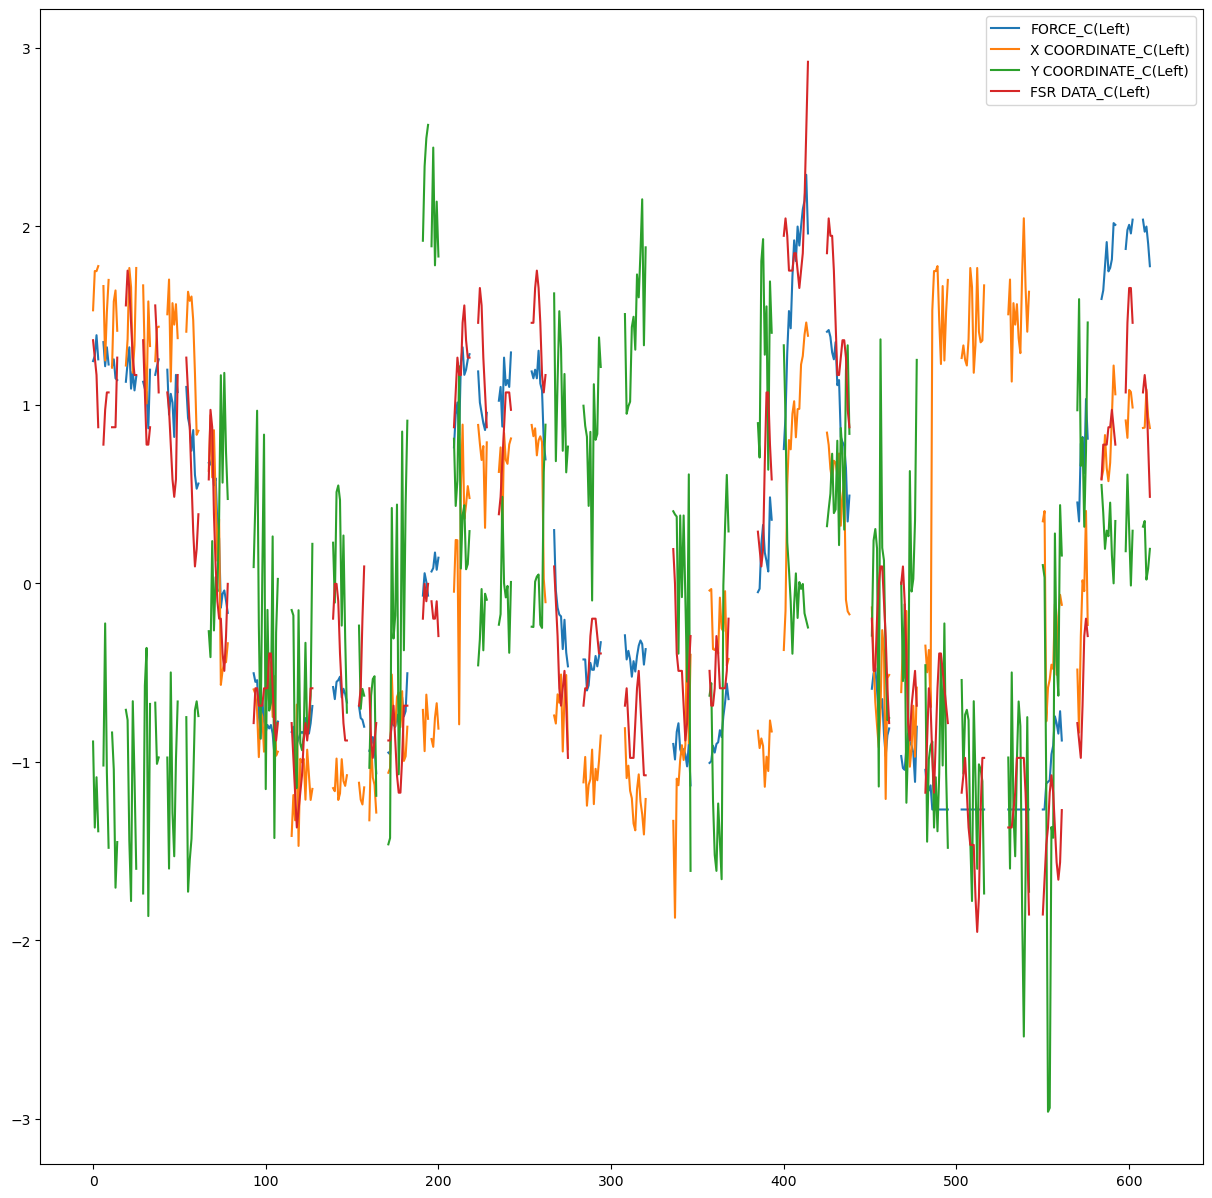

In [7]:
L.plot(figsize=(15,15))

<Axes: >

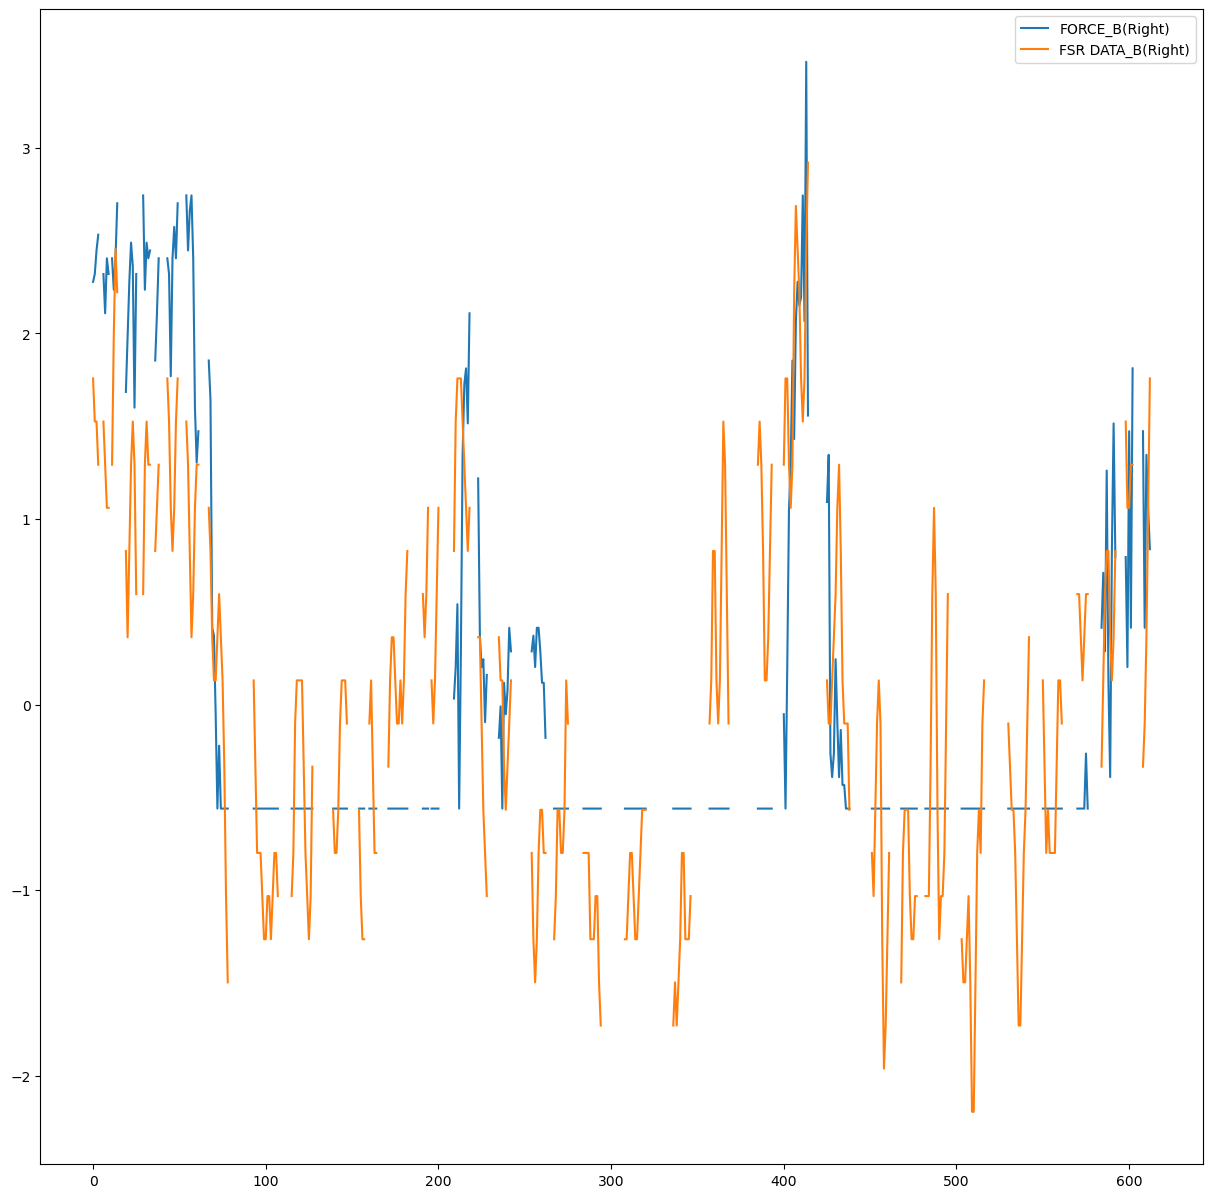

In [8]:
R.plot(figsize=(15,15))

In [9]:
print(L.isnull().sum())
print(R.isnull().sum())

FORCE_C(Left)           265
X COORDINATE_C(Left)    265
Y COORDINATE_C(Left)    265
FSR DATA_C(Left)        265
dtype: int64
FORCE_B(Right)       265
FSR DATA_B(Right)    265
dtype: int64


In [10]:
L_FORECE_C=L.iloc[:,0].copy()
L_XCO_C=L.iloc[:,1].copy()
L_YCO_C=L.iloc[:,2].copy()
L_FSR_C=L.iloc[:,3].copy()

<Axes: >

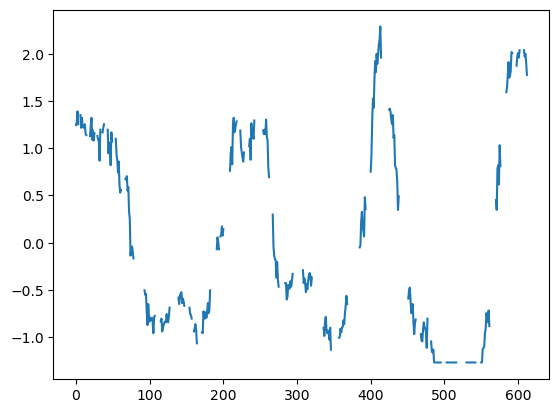

In [11]:
L_FORECE_C.plot()

<Axes: >

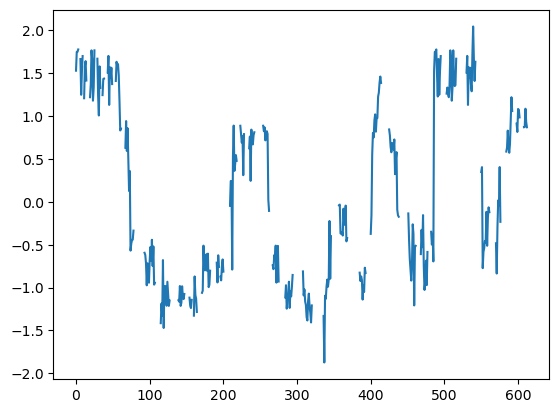

In [12]:
L_XCO_C.plot()

<Axes: >

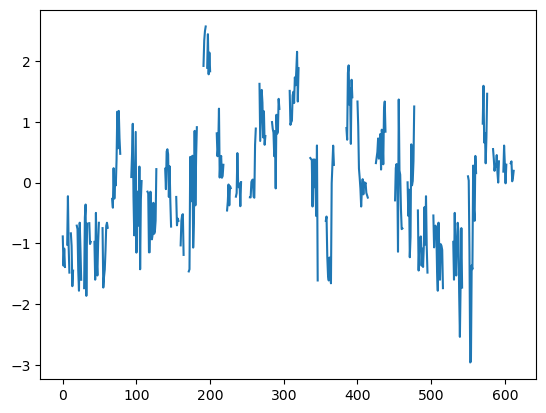

In [13]:
L_YCO_C.plot()

<Axes: >

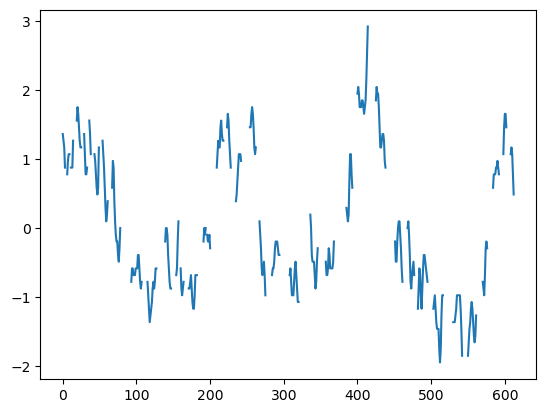

In [14]:
L_FSR_C.plot()

In [15]:
L.columns

Index(['FORCE_C(Left)', 'X COORDINATE_C(Left)', 'Y COORDINATE_C(Left)',
       'FSR DATA_C(Left)'],
      dtype='object')

In [16]:
import numpy as np 

index=L.index

loss_index_L_FORECE_C=np.array(L.index).reshape(-1,1)[L.iloc[:,0].isna()]
loss_index_L_XCO_C=np.array(L.index).reshape(-1,1)[L.iloc[:,1].isna()]
loss_index_L_YCO_C=np.array(L.index).reshape(-1,1)[L.iloc[:,2].isna()]
loss_index_L_FSR_C=np.array(L.index).reshape(-1,1)[L.iloc[:,3].isna()]


normal_index_L_FORECE_C=np.setdiff1d(index,loss_index_L_FORECE_C)
normal_index_L_XCO_C=np.setdiff1d(index,loss_index_L_XCO_C)
normal_index_L_YCO_C=np.setdiff1d(index,loss_index_L_YCO_C)
normal_index_L_FSR_C=np.setdiff1d(index,loss_index_L_FSR_C)


In [17]:
print(loss_index_L_FORECE_C.shape)
print(normal_index_L_FORECE_C.shape)

(265, 1)
(348,)


In [18]:
x_train_L_FORECE_C=normal_index_L_FORECE_C.reshape(-1,1)
y_train_L_FORECE_C=L.iloc[normal_index_L_FORECE_C,0]
x_test_L_FORECE_C=loss_index_L_FORECE_C

x_train_L_XCO_C=normal_index_L_FORECE_C.reshape(-1,1)
y_train_L_XCO_C=L.iloc[normal_index_L_XCO_C,1]
x_test_L_XCO_C=loss_index_L_XCO_C

x_train_L_YCO_C=normal_index_L_YCO_C.reshape(-1,1)
y_train_L_YCO_C=L.iloc[normal_index_L_YCO_C,2]
x_test_L_YCO_C=loss_index_L_YCO_C

x_train_L_FSR_C=normal_index_L_FSR_C.reshape(-1,1)
y_train_L_FSR_C=L.iloc[normal_index_L_FSR_C,3]
x_test_L_FSR_C=loss_index_L_FSR_C

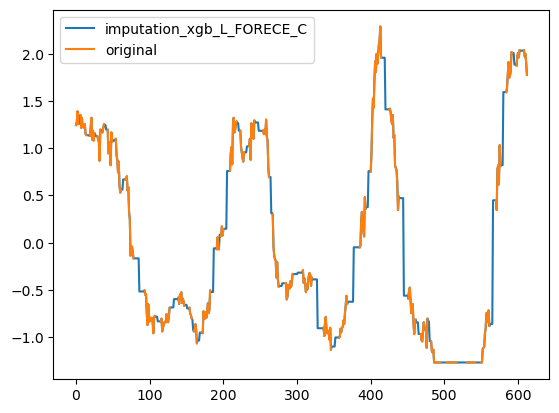

In [19]:
from xgboost.sklearn import XGBRegressor

reg = XGBRegressor().fit(x_train_L_FORECE_C,y_train_L_FORECE_C)
pred=reg.predict(x_test_L_FORECE_C)
pred=pred.reshape(-1,1)

c=0
for i in loss_index_L_FORECE_C:    
    L_FORECE_C[i]=pred[c]
    c+=1
    
    
import matplotlib.pyplot as plt 
plt.plot(L_FORECE_C,label='imputation_xgb_L_FORECE_C')
plt.plot(L.iloc[:,0],label='original')
plt.legend()

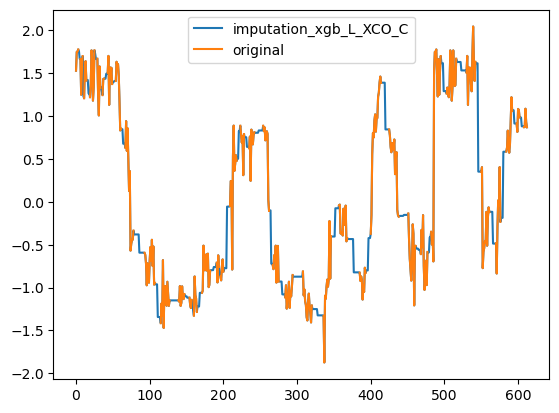

In [20]:
reg = XGBRegressor().fit(x_train_L_XCO_C,y_train_L_XCO_C)
pred=reg.predict(x_test_L_XCO_C)
pred=pred.reshape(-1,1)

c=0
for i in loss_index_L_XCO_C:    
    L_XCO_C[i]=pred[c]
    c+=1
    
    
import matplotlib.pyplot as plt 
plt.plot(L_XCO_C,label='imputation_xgb_L_XCO_C')
plt.plot(L.iloc[:,1],label='original')
plt.legend()

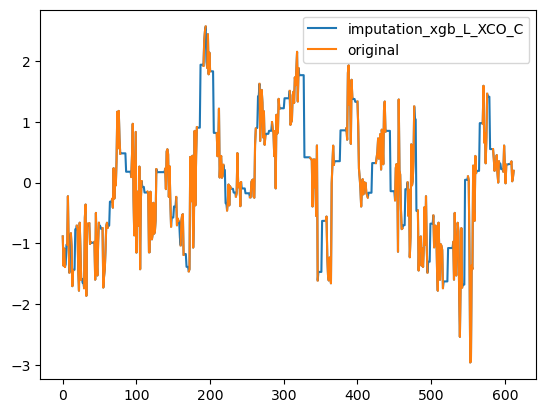

In [21]:
reg = XGBRegressor().fit(x_train_L_YCO_C,y_train_L_YCO_C)
pred=reg.predict(x_test_L_YCO_C)
pred=pred.reshape(-1,1)

c=0
for i in loss_index_L_YCO_C:    
    L_YCO_C[i]=pred[c]
    c+=1
    
    
import matplotlib.pyplot as plt 
plt.plot(L_YCO_C,label='imputation_xgb_L_XCO_C')
plt.plot(L.iloc[:,2],label='original')
plt.legend()

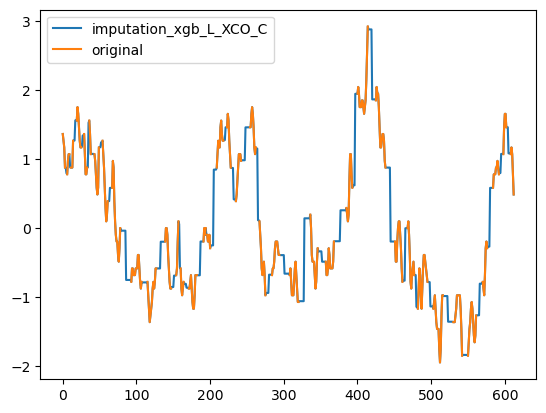

In [22]:
reg = XGBRegressor().fit(x_train_L_FSR_C,y_train_L_FSR_C)
pred=reg.predict(x_test_L_FSR_C)
pred=pred.reshape(-1,1)

c=0
for i in loss_index_L_FSR_C:    
    L_FSR_C[i]=pred[c]
    c+=1
    
    
import matplotlib.pyplot as plt 
plt.plot(L_FSR_C,label='imputation_xgb_L_XCO_C')
plt.plot(L.iloc[:,3],label='original')
plt.legend()

In [23]:
L.isnull().sum()

FORCE_C(Left)           265
X COORDINATE_C(Left)    265
Y COORDINATE_C(Left)    265
FSR DATA_C(Left)        265
dtype: int64

In [24]:
for i in loss_index_L_FORECE_C:    
    L['FORCE_C(Left)'][i]=L_FORECE_C[i]
    
for i in loss_index_L_XCO_C:    
    L['X COORDINATE_C(Left)'][i]=L_XCO_C[i]
    
for i in loss_index_L_YCO_C:    
    L['Y COORDINATE_C(Left)'][i]=L_YCO_C[i]

for i in loss_index_L_FSR_C:    
    L['FSR DATA_C(Left)'][i]=L_FSR_C[i]
    
L.isnull().sum()

FORCE_C(Left)           0
X COORDINATE_C(Left)    0
Y COORDINATE_C(Left)    0
FSR DATA_C(Left)        0
dtype: int64

<Axes: >

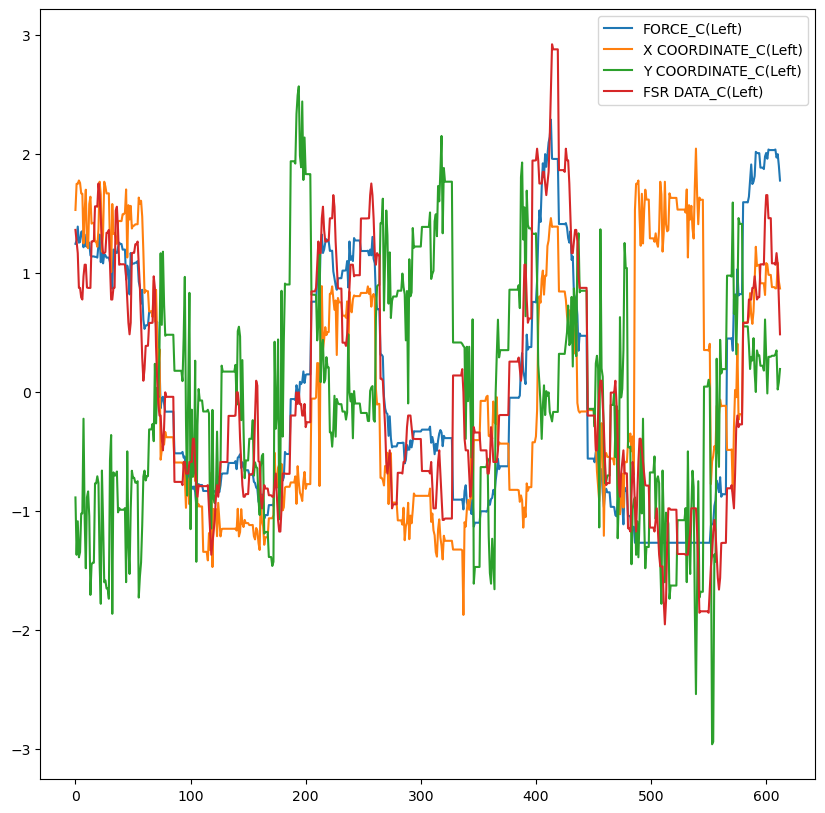

In [25]:
L.plot(figsize=(10,10))

In [26]:


L = pd.DataFrame(scaler.inverse_transform(L))

In [101]:
L

,0,1,2,3
0,260.000000,3.325000,12.434615,53.000000
1,263.000000,3.378327,12.311787,52.000000
2,275.000000,3.378182,12.383636,51.000000
3,261.000000,3.385057,12.306513,48.000000
4,261.494185,3.380056,12.317546,48.001235
...,...,...,...,...
608,342.000000,3.165205,12.741228,50.000000
609,335.000000,3.165672,12.749254,51.000000
610,338.000000,3.217456,12.665680,50.000000
611,328.000000,3.179878,12.681402,47.000000


In [102]:
L_new=L.set_axis(["FORCE_C(Left)","X COORDINATE_C(Left)","Y COORDINATE_C(Left)",
            "FSR DATA_C(Left)"],axis="columns")

In [103]:
L_new

,FORCE_C(Left),X COORDINATE_C(Left),Y COORDINATE_C(Left),FSR DATA_C(Left)
0,260.000000,3.325000,12.434615,53.000000
1,263.000000,3.378327,12.311787,52.000000
2,275.000000,3.378182,12.383636,51.000000
3,261.000000,3.385057,12.306513,48.000000
4,261.494185,3.380056,12.317546,48.001235
...,...,...,...,...
608,342.000000,3.165205,12.741228,50.000000
609,335.000000,3.165672,12.749254,51.000000
610,338.000000,3.217456,12.665680,50.000000
611,328.000000,3.179878,12.681402,47.000000


<Axes: >

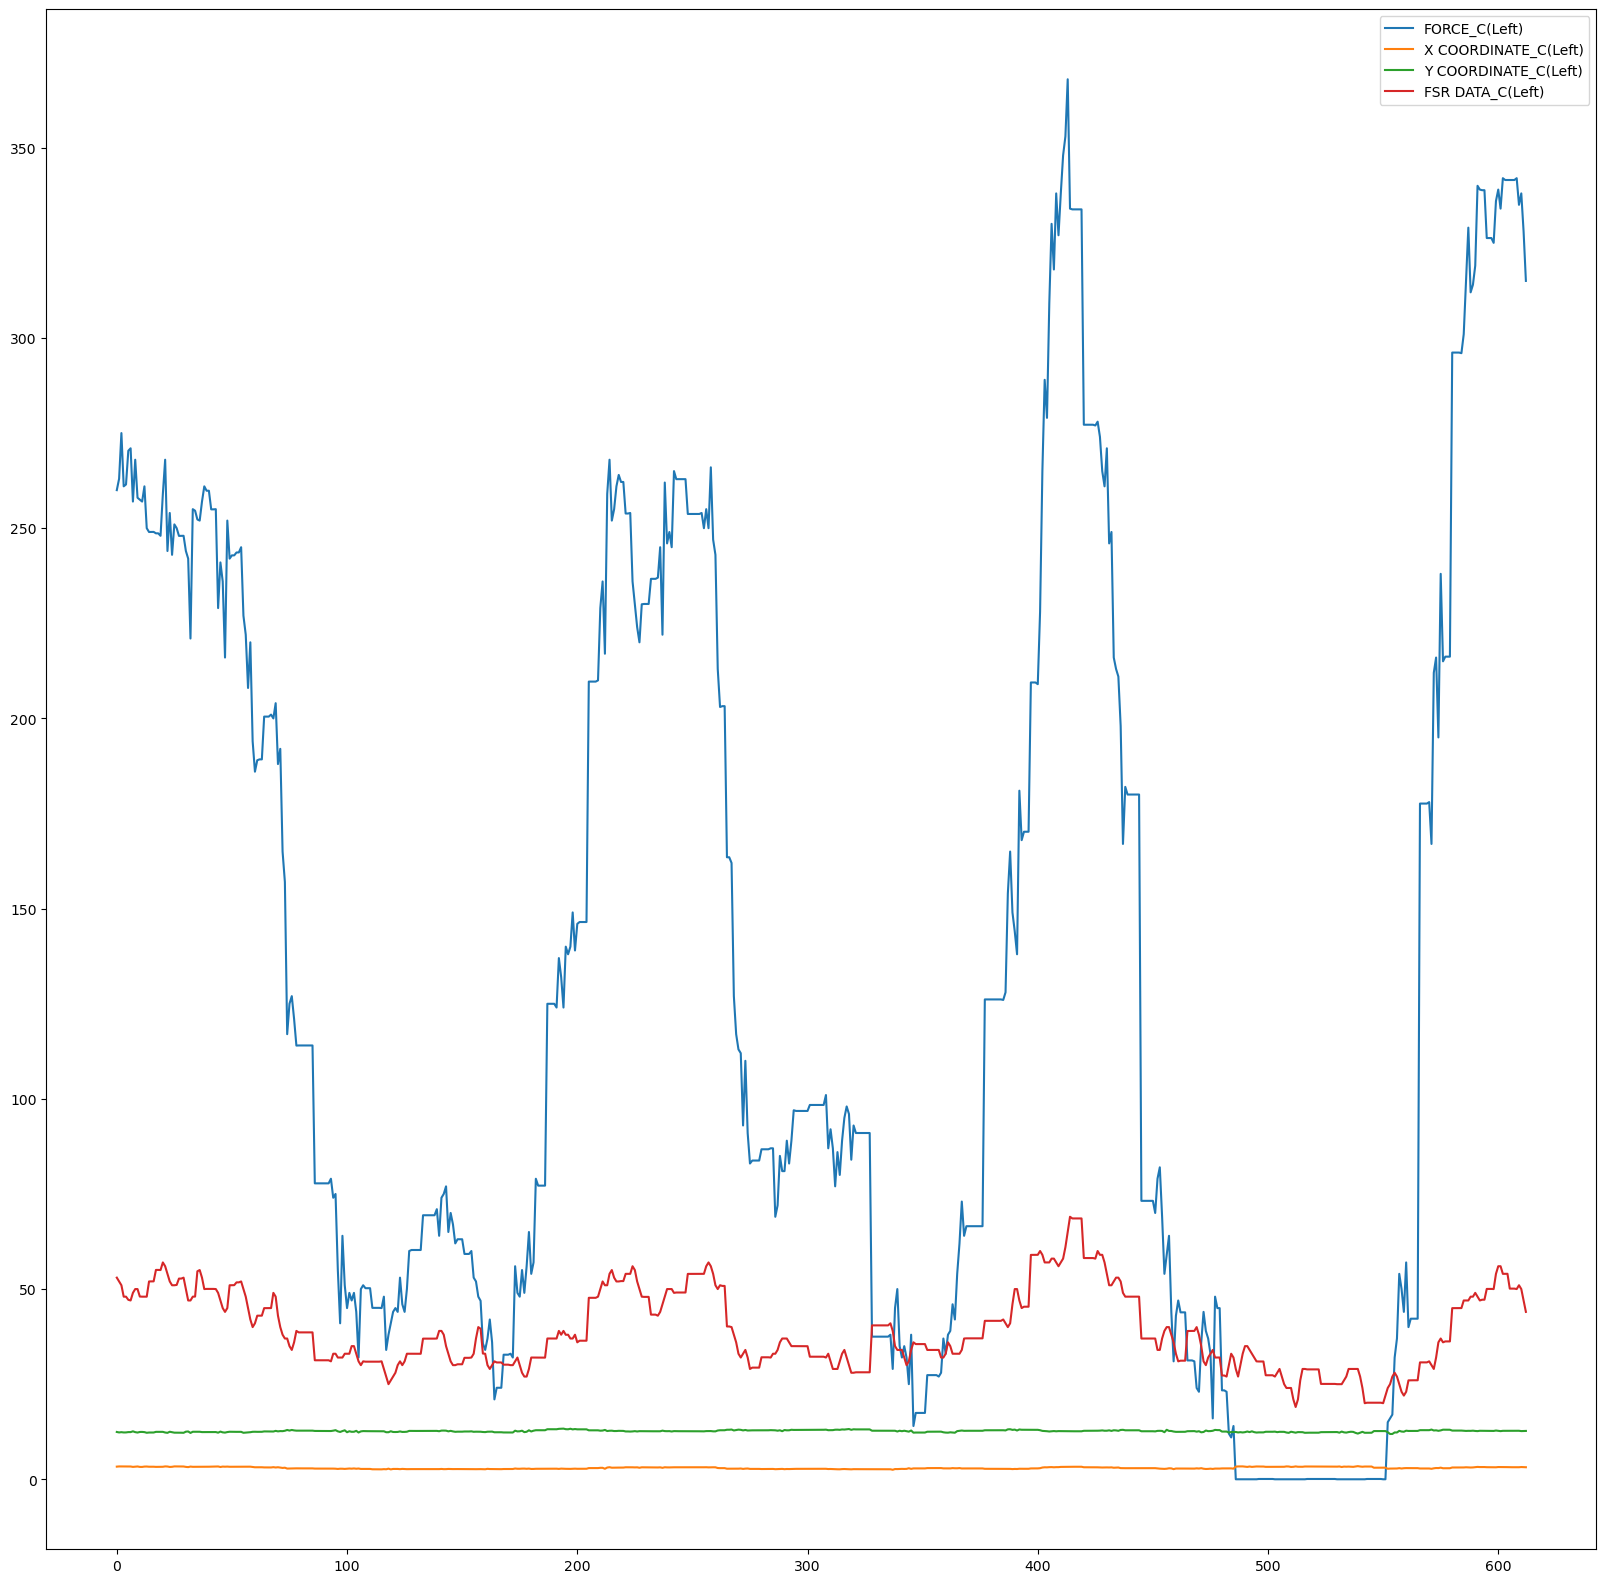

In [104]:
L_new.plot(figsize=(20,20))